# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder, MinMaxScaler
import pandas as pd
import tensorflow as tf
#  Import and read the charity_data.csv.
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

In [2]:
# List categorical columns
application_df.columns.tolist()

['EIN',
 'NAME',
 'APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'STATUS',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS',
 'ASK_AMT',
 'IS_SUCCESSFUL']

In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME', ORGANIZATION.
application_df1 = application_df.drop(columns=["EIN", "NAME"])

In [4]:
# Determine the number of unique values in each column.
application_cat = application_df1.dtypes[application_df1.dtypes == "object"].index.tolist()

application_df1[application_cat].nunique()

APPLICATION_TYPE          17
AFFILIATION                6
CLASSIFICATION            71
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
dtype: int64

In [5]:
# Look at APPLICATION_TYPE value counts for binning
app_counts = application_df.APPLICATION_TYPE.value_counts()
app_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

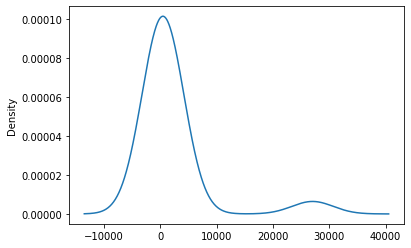

In [6]:
# Visualize the value counts of APPLICATION_TYPE
app_counts.plot.density()

In [7]:
# Determine which values to replace if counts are less than ...?
replace_app = list(app_counts[app_counts < 500].index)

# Replace in dataframe
for app in replace_app:
    application_df1.APPLICATION_TYPE = application_df1.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df1.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [9]:
# Look at CLASSIFICATION value counts for binning
class_counts = application_df1.CLASSIFICATION.value_counts()
class_counts.head(10)

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
Name: CLASSIFICATION, dtype: int64

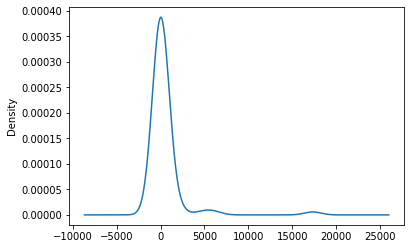

In [10]:
# Visualize the value counts of CLASSIFICATION
class_counts.plot.density()

In [11]:
# Determine which values to replace if counts are less than ..?
replace_class = list(class_counts[class_counts < 200].index)

# Replace in dataframe
for cls in replace_class:
    application_df1.CLASSIFICATION = application_df1.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df1.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1197
C7000      777
C1700      287
Name: CLASSIFICATION, dtype: int64

In [12]:
import numpy as np
# Add Earned Income column
application_df1["Earned_Income"] = np.where(application_df1["INCOME_AMT"] != "0", "Yes", "No")
application_df1.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,Earned_Income
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1,No
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1,Yes
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0,No
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1,Yes
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1,Yes


In [13]:
!pip install keras-tuner

     |████████████████████████████████| 133 kB 5.3 MB/s 


In [14]:
import keras_tuner as kt

In [22]:
# Generate our categorical variable lists
application_cat = application_df1.dtypes[application_df1.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS',
 'Earned_Income']

In [23]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df1[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y,Earned_Income_No,Earned_Income_Yes
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [24]:
# Merge one-hot encoded features and drop the originals
app_df = application_df1.merge(encode_df, left_index=True, right_index=True)
app_df = app_df.drop(application_cat, 1)
app_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y,Earned_Income_No,Earned_Income_Yes
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [25]:
# Split our preprocessed data into our features and target arrays
y = app_df.IS_SUCCESSFUL
X = app_df.drop(columns=["IS_SUCCESSFUL"])

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [26]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [27]:
# Use the Keras hypertuner to determine the optimal model.
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()
    number_input_features = len(X_train_scaled[0])

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=10,
        step=2), activation=activation, input_dim=number_input_features))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=10,
            step=2),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

In [ ]:
!pip install -- upgrade tensorflow

ERROR: Could not find a version that satisfies the requirement upgrade (from versions: none)
ERROR: No matching distribution found for upgrade


In [28]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=5)

In [29]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

Trial 150 Complete [00h 00m 41s]
val_accuracy: 0.7304956316947937

Best val_accuracy So Far: 0.7322449088096619
Total elapsed time: 00h 37m 51s
INFO:tensorflow:Oracle triggered exit


In [30]:
#Print the best model.
best_hyper = tuner.get_best_hyperparameters()[0]
print(best_hyper.values)

{'activation': 'tanh', 'first_units': 9, 'num_layers': 4, 'units_0': 7, 'units_1': 7, 'units_2': 7, 'units_3': 5, 'units_4': 7, 'units_5': 1, 'tuner/epochs': 20, 'tuner/initial_epoch': 0, 'tuner/bracket': 0, 'tuner/round': 0}


In [31]:
# Create the model based on the best choice for the model.

model = tuner.hypermodel.build(best_hyper)

In [32]:
# Compile the model.
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [33]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [34]:
# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=4000)

In [35]:
# Train the model
fit_model = model.fit(X_train_scaled,y_train,epochs=500,callbacks=[cp_callback])

Epoch 1/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5904 - accuracy: 0.7019
Epoch 2/500
804/804 [==============================] - 1s 2ms/step - loss: 0.5618 - accuracy: 0.7249
Epoch 3/500
804/804 [==============================] - 1s 2ms/step - loss: 0.5566 - accuracy: 0.7303
Epoch 4/500
804/804 [==============================] - 1s 2ms/step - loss: 0.5543 - accuracy: 0.7300
Epoch 5/500
769/804 [===========================>..] - ETA: 0s - loss: 0.5535 - accuracy: 0.7305
Epoch 5: saving model to checkpoints/weights.05.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5528 - accuracy: 0.7311
Epoch 6/500
804/804 [==============================] - 1s 2ms/step - loss: 0.5516 - accuracy: 0.7304
Epoch 7/500
804/804 [==============================] - 1s 2ms/step - loss: 0.5511 - accuracy: 0.7322
Epoch 8/500
804/804 [==============================] - 1s 2ms/step - loss: 0.5497 - accuracy: 0.7321
Epoch 9/500
804/804 [==============================] -

In [36]:
# Evaluate the model using the test data
model_loss, model_accuracy = model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5553 - accuracy: 0.7310 - 425ms/epoch - 2ms/step
Loss: 0.555322527885437, Accuracy: 0.7309620976448059


In [31]:
# Export our model to HDF5 file
model.save("AlphabetSoupCharityOptimzation3.h5")

[For the first Model ](https://github.com/pbarana89/Neural_Network_Charity_Analysis/blob/main/AlphabetSoupCharity_Optimization1.ipynb)